In [78]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
import math
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:,.2f}'.format
import seaborn as sns
from scipy.stats import norm, skew #for some statistics
%matplotlib inline

from scipy import stats

In [79]:
## load in the preprocessed data and the sale prices for training data
data = pd.read_csv('Master_DF.csv')
data.set_index('Id', inplace=True)

In [80]:
# import raw training data and get log of prices
train_raw = pd.read_csv('train.csv')
train_raw.set_index('Id', inplace=True)
logprices = np.log10(train_raw.SalePrice)

In [81]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
columns = list(data.columns)

In [82]:
scaled = pd.DataFrame(data_scaled, columns=columns)
scaled.index +=1
train = scaled.loc[1:1460,]
test = scaled.loc[1461:2919,]

In [83]:
outliers = list(train_raw[(train_raw['GrLivArea']>4000) & (train_raw['SalePrice']<300000)].index)
outliers

[524, 1299]

In [84]:
##Drop some of the correlated and categorical variables
dropcols = ['MSSubClass','MasVnrArea']
droprows = outliers
trim = scaled.drop(columns=dropcols)
trim = trim.drop(droprows)
trimprices = logprices.drop(droprows)

In [85]:
trim.head()


,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,0.06,0.06,0.75,0.32,0.59,-0.22,-1.25,-0.05,-0.01,-0.42,...,0.30,-0.74,0.20,-0.36,-0.10,-0.29,-0.06,-0.09,-1.55,0.16
2,0.06,0.06,0.75,0.32,-0.66,-0.22,1.94,-1.19,-0.01,-0.42,...,0.23,1.61,-0.70,-0.36,-0.10,-0.29,-0.06,-0.09,-0.45,-0.60
3,0.06,0.06,-1.38,0.32,0.59,-0.22,-1.25,-0.05,-0.01,-0.42,...,0.29,-0.74,-0.08,-0.36,-0.10,-0.29,-0.06,-0.09,1.03,0.16
4,0.06,0.06,-1.38,0.32,-1.90,-0.22,-1.08,-0.05,-0.01,-0.42,...,0.28,-0.74,-0.18,3.87,-0.10,-0.29,-0.06,-0.09,-1.55,-1.36
5,0.06,0.06,-1.38,0.32,-0.66,-0.22,0.43,-0.05,-0.01,-0.42,...,0.29,0.78,0.54,-0.36,-0.10,-0.29,-0.06,-0.09,2.13,0.16


In [86]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
trim["GrLivAreaLog"] = np.log1p(trim["GrLivArea"])




/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


In [87]:
trim['GrLivAreaLog'].head()

1    0.35
2   -0.64
3    0.45
4    0.36
5    0.87
Name: GrLivAreaLog, dtype: float64

In [88]:
trim["GrLivAreaLog"] = trim["GrLivAreaLog"].fillna(0)

In [89]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
trim["TotalBsmtSFLog"] = np.log1p(trim["TotalBsmtSF"])

trim["TotalBsmtSFLog"] = trim["TotalBsmtSFLog"].fillna(0)

trim['TotalBsmtSFLog'].head()



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


1   -0.59
2    0.39
3   -0.35
4   -1.11
5    0.19
Name: TotalBsmtSFLog, dtype: float64

In [90]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
trim["TotalBsmtSFLog"] = np.log1p(trim["TotalBsmtSF"])

trim["TotalBsmtSFLog"] = trim["TotalBsmtSFLog"].fillna(0)

trim['TotalBsmtSFLog'].head()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


1   -0.59
2    0.39
3   -0.35
4   -1.11
5    0.19
Name: TotalBsmtSFLog, dtype: float64

In [91]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
trim["BsmtFinSF1Log"] = np.log1p(trim["BsmtFinSF1"])

trim["BsmtFinSF1Log"] = trim["BsmtFinSF1Log"].fillna(0)

trim['BsmtFinSF1Log'].head()


1    0.46
2    0.78
3    0.09
4   -0.68
5    0.38
Name: BsmtFinSF1Log, dtype: float64

In [92]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
trim["GarageAreaLog"] = np.log1p(trim["GarageArea"])

trim["GarageAreaLog"] = trim["GarageAreaLog"].fillna(0)

trim['GarageAreaLog'].head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


1    0.30
2   -0.06
3    0.49
4    0.58
5    0.99
Name: GarageAreaLog, dtype: float64

In [93]:
trim.head()

,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GrLivAreaLog,TotalBsmtSFLog,BsmtFinSF1Log,GarageAreaLog
1,0.06,0.06,0.75,0.32,0.59,-0.22,-1.25,-0.05,-0.01,-0.42,...,-0.10,-0.29,-0.06,-0.09,-1.55,0.16,0.35,-0.59,0.46,0.30
2,0.06,0.06,0.75,0.32,-0.66,-0.22,1.94,-1.19,-0.01,-0.42,...,-0.10,-0.29,-0.06,-0.09,-0.45,-0.60,-0.64,0.39,0.78,-0.06
3,0.06,0.06,-1.38,0.32,0.59,-0.22,-1.25,-0.05,-0.01,-0.42,...,-0.10,-0.29,-0.06,-0.09,1.03,0.16,0.45,-0.35,0.09,0.49
4,0.06,0.06,-1.38,0.32,-1.90,-0.22,-1.08,-0.05,-0.01,-0.42,...,-0.10,-0.29,-0.06,-0.09,-1.55,-1.36,0.36,-1.11,-0.68,0.58
5,0.06,0.06,-1.38,0.32,-0.66,-0.22,0.43,-0.05,-0.01,-0.42,...,-0.10,-0.29,-0.06,-0.09,2.13,0.16,0.87,0.19,0.38,0.99


R squared: 0.918799879042916
Root Mean Squared Error: 0.049449803528797576


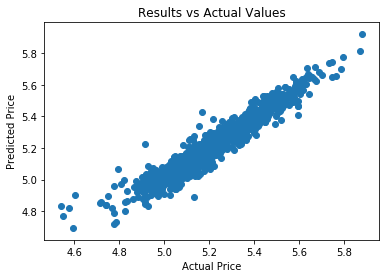

In [94]:
train = trim.loc[1:1460,]
test = trim.loc[1461:2919,]
linreg = LinearRegression()
linreg.fit(train, trimprices)
yhat = linreg.predict(train)
y = trimprices
plt.scatter(y, yhat)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Results vs Actual Values')
print("R squared:",linreg.score(train, y, sample_weight=None))
RMSE = math.sqrt(mean_squared_error(y, yhat))
print("Root Mean Squared Error:",RMSE)

In [95]:
submission = pd.DataFrame({'Id':test.index, 'SalePrice': np.power(10, linreg.predict(test))})
submission.set_index('Id', inplace=True)
print(submission.head())
timestamp = datetime.now().strftime('%m-%d-%H-%M-%S')

      SalePrice
Id             
1461 120,552.80
1462 156,971.03
1463 176,741.26
1464 194,441.04
1465 186,979.66


In [65]:
submission.to_csv(f'submission_files/Sub{timestamp}.csv')